<a href="https://colab.research.google.com/github/AntoniKingston/PyTorchCourse/blob/main/01_PyTorch_Workflow_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# 1.

## a)

In [6]:
weight = 0.3
bias = 0.9
X = torch.linspace(0,10, 101)
y = weight * X + bias
split = 0.7 * len(X)


## b)

In [7]:
X_train = X[:int(split)]
y_train = y[:int(split)]
X_test = X[int(split):]
y_test = y[int(split):]

## c)

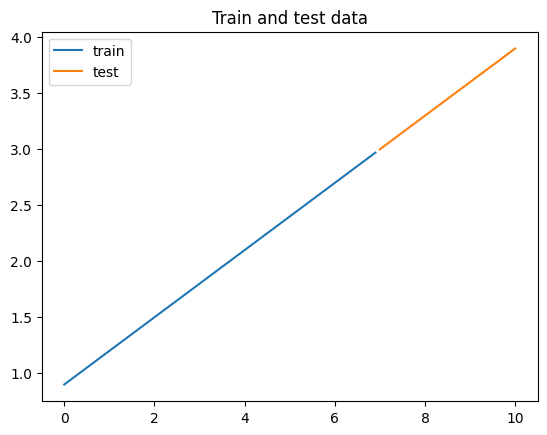

In [11]:
plt.plot(X_train, y_train, '-', label = "train")

plt.plot(X_test, y_test, '-', label = "test")
plt.title("Train and test data")

plt.legend(loc = "upper left")
plt.show()

# 2.

## a) b)

In [13]:
class MyModel(torch.nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.weight = torch.nn.Parameter(torch.rand(1), requires_grad = True)
        self.bias = torch.nn.Parameter(torch.rand(1), requires_grad = True)

    def forward(self, x):
        return self.weight * x + self.bias


## c)

In [14]:
mymodel = MyModel()
print(mymodel.state_dict())

OrderedDict([('weight', tensor([0.0651])), ('bias', tensor([0.1887]))])


# 3.

## a)

In [15]:
loss_function = torch.nn.L1Loss()
optimizer = torch.optim.SGD(mymodel.parameters(), lr = 0.01)

## b) c)

In [16]:
epochs = [i+1 for i in range(300)]
loss = loss_function(mymodel(X_train), y_train)
print(f"Epoch: 0, Loss: {loss.item()}")
for epoch in epochs:
    optimizer.zero_grad()
    y_pred = mymodel(X_train)
    loss = loss_function(y_pred, y_train)
    if epoch % 20 == 0:
        print(f"Epoch: {epoch}, Loss: {loss.item()}")
    loss.backward()
    optimizer.step()

Epoch: 0, Loss: 1.5215790271759033
Epoch: 20, Loss: 0.23948465287685394
Epoch: 40, Loss: 0.20587635040283203
Epoch: 60, Loss: 0.17226795852184296
Epoch: 80, Loss: 0.13865958154201508
Epoch: 100, Loss: 0.10505387932062149
Epoch: 120, Loss: 0.0714559257030487
Epoch: 140, Loss: 0.04965905845165253
Epoch: 160, Loss: 0.0759836733341217
Epoch: 180, Loss: 0.07620099186897278
Epoch: 200, Loss: 0.09428197145462036
Epoch: 220, Loss: 0.09850102663040161
Epoch: 240, Loss: 0.09961506724357605
Epoch: 260, Loss: 0.09961506724357605
Epoch: 280, Loss: 0.09961506724357605
Epoch: 300, Loss: 0.09961506724357605


# 4.

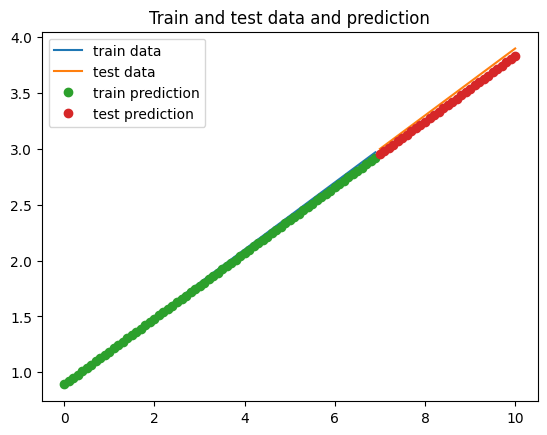

In [23]:
y_train_pred = mymodel(X_train).detach().numpy()
y_test_pred = mymodel(X_test).detach().numpy()

plt.plot(X_train, y_train, '-', label = "train data")
plt.plot(X_test, y_test, '-', label = "test data")
plt.plot(X_train, y_train_pred, 'o', label = "train prediction")
plt.plot(X_test, y_test_pred, 'o', label = "test prediction")
plt.title("Train and test data and prediction")

plt.legend(loc = "upper left")
plt.show()

# 5.

In [25]:
myModel2 = MyModel()
myModel2.load_state_dict(mymodel.state_dict())
y_train_pred_2 = myModel2(X_train).detach().numpy()
y_test_pred_2 = myModel2(X_test).detach().numpy()
print(np.sum((y_train_pred - y_train_pred_2)**2))
print(np.sum((y_test_pred - y_test_pred_2)**2))

0.0
0.0
